# #1 세계 주요 지수의 등락률 비교(최적화)

In [1]:
# Data Analysis and Visualization
import pandas                as pd
import numpy                 as np
from   sklearn.preprocessing import MinMaxScaler
import talib # TA-Lib은 금융 시장 데이터의 기술적 분석을 수행하는데 필요한 멀티플랫폼 라이브러리 입니다.
# Visualization
import matplotlib           as mpl
from   matplotlib           import font_manager, rc
import matplotlib.pyplot    as plt
import seaborn              as sns
import mplfinance           as mpf # 주가데이터 가져오기
import plotly.graph_objects as go
import plotly.subplots      as ms
# Time Handling
import time
from   pytz     import timezone
from   datetime import date, datetime, timedelta
# HTTP Requests
from urllib.request import urlopen
# Data Sources
from   pykrx             import stock, bond
from pandas_datareader import data as pdr
import yfinance as yfin
# Configurations
import warnings
yfin.pdr_override()

In [2]:
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'SeoulNamsan'

In [3]:
warnings.filterwarnings('ignore')             # 경고 무시
# Date Strings
YESTERDAY             = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(1)  , "%Y-%m-%d") # Yesterday (Format:"YYYYMMDD")
PREVIOUS_BUSINESS_DAY = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(3)  , "%Y-%m-%d") if datetime.now(timezone('Asia/Seoul')).weekday() == 0 else YESTERDAY # Previous Business Day (Format:"YYYYMMDD")
TODAY                 = datetime.strftime(datetime.now(timezone('Asia/Seoul'))                 , "%Y-%m-%d") # Yesterday (Format:"YYYYMMDD")
TOMORROW              = datetime.strftime(datetime.now(timezone('Asia/Seoul')) + timedelta(1)  , "%Y-%m-%d") # Yesterday (Format:"YYYYMMDD")
LAST_YEAR             = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(365), "%Y")     # Last year (Format:"YYYY")
CURRENT_YEAR          = datetime.strftime(datetime.now(timezone('Asia/Seoul'))                 , "%Y")     # Current year (Format:"YYYY")/

In [4]:
# Tickers of World Indexes
WORLD_INDEX_TICKERS = [ {'ticker':'^GSPC',     'nation':'US',          'name':'S&P 500'},
                        {'ticker':'^IXIC',     'nation':'US',          'name':'NASDAQ Composite'},
                        {'ticker':'^N225',     'nation':'Japan',       'name':'Nikkei 225'},
                        {'ticker':'399001.SZ', 'nation':'China',       'name':'Shenzhen Index'},
                        {'ticker':'^KS11',     'nation':'Korea',       'name':'KOSPI Composite Index'},
]

In [5]:
def get_world_index(ticker, startDt="2000-01-01", endDt=YESTERDAY):
    """
    세계 주요 주가 지수의 일별 OHCLV(Open, High, Close, Low, Volume) 데이터를 담은 DataFrame을 반환한다.
    [Parameters]
    ticker  (str) : 조회할 지수의 Ticker
    startDt (str) : 조회할 데이터의 시작 일자 (YYYYMMDD) (Default: "20000101")
    endDt   (str) : 조회할 데이터의 종료 일자 (YYYYMMDD) (Default: 전일)
    [Returns]
    pandas.core.frame.DataFrame : 세계 주요 주가 지수의 일별 OHCLV 데이터를 담은 DataFrame
    """
    startDt_datetime = datetime.strptime(startDt, '%Y-%m-%d')
    endDt_datetime   = datetime.strptime(endDt,   '%Y-%m-%d')
    return pdr.get_data_yahoo(ticker, startDt_datetime, endDt_datetime)

def get_normalization(df_ts):
    """
    시계열 데이터를 MinMaxScaler로 정규화한 결과를 반환한다.
    [Parameters]
    df_ts (pandas.core.frame.DataFrame) : 정규화할 시계열 데이터가 담긴 DataFrame
    [Returns]
    pandas.core.frame.DataFrame : 정규화된 시계열 데이터가 담긴 DataFrame
    """
    return MinMaxScaler().fit_transform(df_ts)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


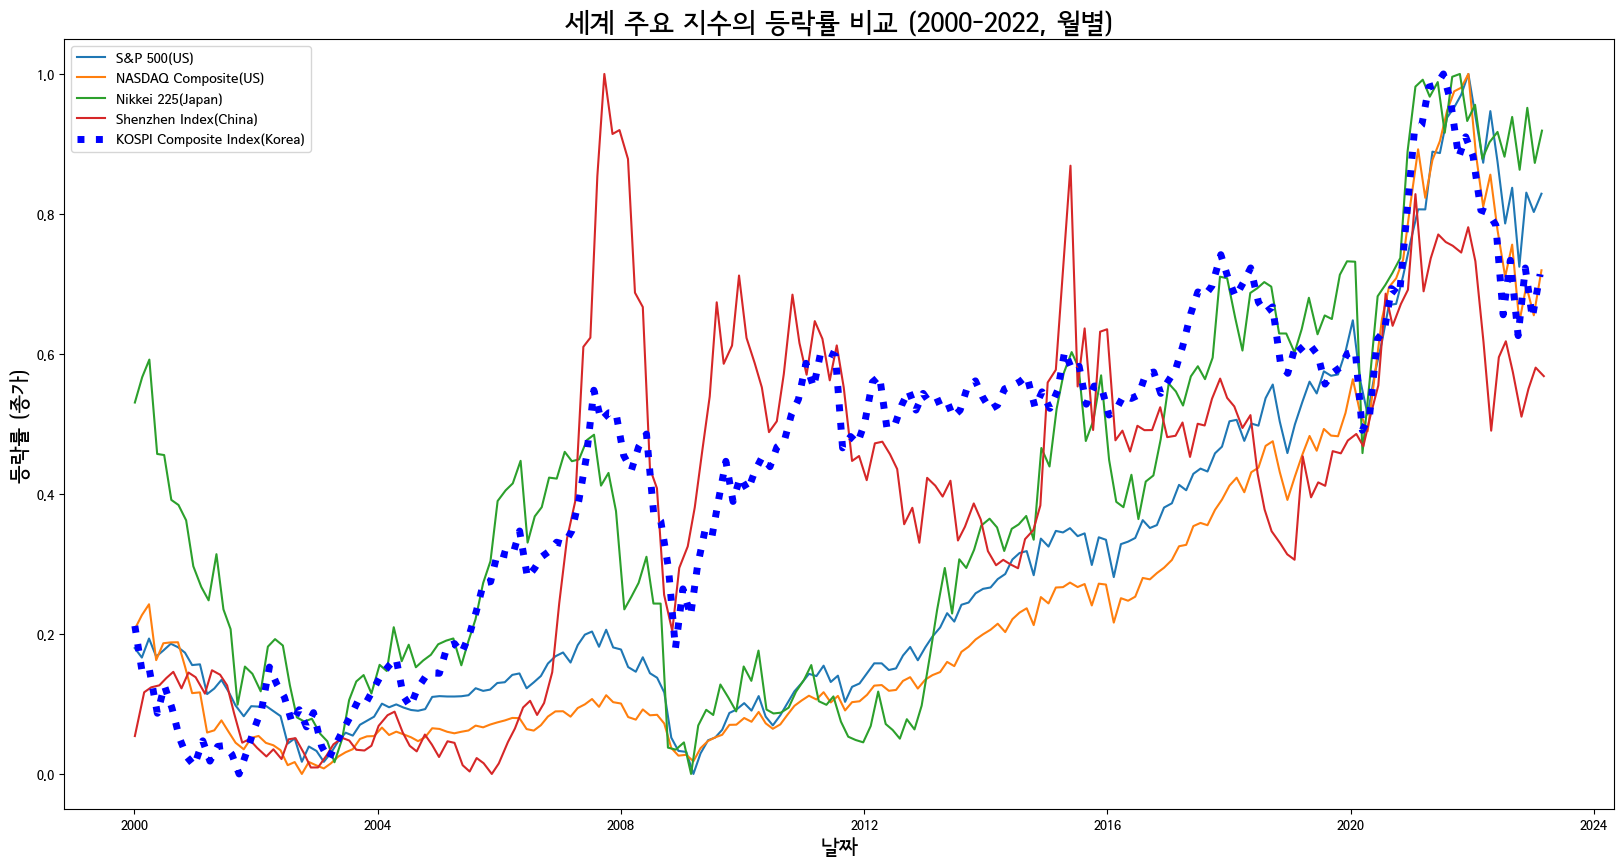

In [6]:
fig = plt.figure( figsize=(20, 10)) # 그래프 크기 조절
for index in WORLD_INDEX_TICKERS:
    index_df    = get_world_index(index['ticker'])[['Close']][::30]
    index_df[:]    = get_normalization(index_df)
    if index['ticker'] == '^KS11':
        ax1 = sns.lineplot(
            data      = index_df,
            x         = 'Date',
            y         = 'Close',
            label     = index['name'] + f"({index['nation']})",
            color     = 'blue',
            linewidth = 5,
            linestyle = ':'
        )
    else:
        ax1 = sns.lineplot(
            data    = index_df,
            x       = 'Date',
            y       = 'Close',
            label   = index['name'] + f"({index['nation']})",
        )
plt.title('세계 주요 지수의 등락률 비교 (2000-2022, 월별)', fontsize=20)
plt.ylabel('등락률 (종가)', fontsize=15)
plt.xlabel('날짜', fontsize=15)
plt.legend(loc = 'upper left')
sns.set_theme(style='whitegrid')
plt.show()


In [7]:
index_df    = get_world_index('^IXIC')[['Close']][::30]
index_df[:]    = get_normalization(index_df)
index_df


[*********************100%***********************]  1 of 1 completed


,Close
Date,
2000-01-03,0.206635
2000-02-15,0.226815
2000-03-29,0.242416
2000-05-11,0.162629
2000-06-23,0.186721
...,...
2022-08-29,0.756149
2022-10-11,0.645259
2022-11-22,0.697393


In [8]:
index_df    = get_world_index('^N225')[['Close']][::30]
index_df

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2000-01-04,19002.859375
2000-02-17,19791.400391
2000-03-31,20337.320312
2000-05-17,17404.029297
2000-06-28,17370.169922
...,...
2022-08-29,27878.960938
2022-10-13,26237.419922
2022-11-28,28162.830078


In [9]:
index_df    = get_world_index('399001.SZ')[['Close']][::30]
index_df[:]    = get_normalization(index_df)
index_df

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2000-01-04,0.054135
2000-02-29,0.116708
2000-04-11,0.123738
2000-05-30,0.126587
2000-07-11,0.136987
...,...
2022-09-02,0.574269
2022-10-24,0.510386
2022-12-05,0.550242


In [10]:
index_df    = get_world_index('^KS11')[['Close']][::30]
index_df[:]    = get_normalization(index_df)
index_df

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2000-01-04,0.211498
2000-02-16,0.146780
2000-03-30,0.150546
2000-05-18,0.086743
2000-06-30,0.125771
...,...
2022-08-18,0.733822
2022-10-04,0.626161
2022-11-16,0.722792


In [11]:
now = datetime.today()
end_day = datetime(now.year, now.month, now.day)
start_day = end_day - timedelta(days = 365)
kospi_df = stock.get_index_fundamental(start_day.strftime('%Y%m%d'), end_day.strftime('%Y%m%d'), "1001")
a = kospi_df.iloc[-1, 0]
b = kospi_df.iloc[-2, 0]
print(a)
print(b)
delta = str(round((a-b) /a * 100,2)) + '%'
print(delta)

2411.56
2424.48
-0.54%


In [12]:
kospi_df.iloc[-1, 1]

-0.53

In [13]:
index_df    = get_world_index('^GSPC')[['Close']]
index_df


[*********************100%***********************]  1 of 1 completed


,Close
Date,
2000-01-03,1455.219971
2000-01-04,1399.420044
2000-01-05,1402.109985
2000-01-06,1403.449951
2000-01-07,1441.469971
...,...
2023-03-16,3960.280029
2023-03-17,3916.639893
2023-03-20,3951.570068


In [14]:
a = index_df.iloc[-1, 0]
b = index_df.iloc[-2, 0]
print(a)
print(b)
delta = str(round((b-a) /a * 100,2)) + '%'
print(delta)

3936.969970703125
4002.8701171875
1.67%


In [15]:
round((a-b) /a * 100,2)

-1.67